In [2]:
# ======== 觀察資料bounding box顯示 使用 =========
import os
import sys

#if "/opt/ros/kinetic/lib/python2.7/dist-packages" in sys.path:
#   sys.path.remove("/opt/ros/kinetic/lib/python2.7/dist-packages")
import cv2
import numpy as np
from skimage import io
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import patches, lines
from matplotlib.patches import Polygon, Rectangle
from matplotlib.collections import PatchCollection
%matplotlib inline

from pycocotools.coco import COCO
#matplotlib.use('TkAgg')

In [3]:
_COLORS = np.random.rand(201, 3)

In [4]:
# annfile = r'/media/ian/WD/PythonProject/rpc_toolboxes/synthesize_100_train.json'
# imgroot = r'/media/ian/WD/PythonProject/rpc_toolboxes/synthesize_100_train_shadow'
annfile = r'D:\datasets\rpc_list\synthesize_5000_single.json'
imgroot = r'D:\datasets\rpc_list\synthesize_5000_single_shadow'

coco = COCO(annfile)

loading annotations into memory...
Done (t=0.16s)
creating index...
index created!


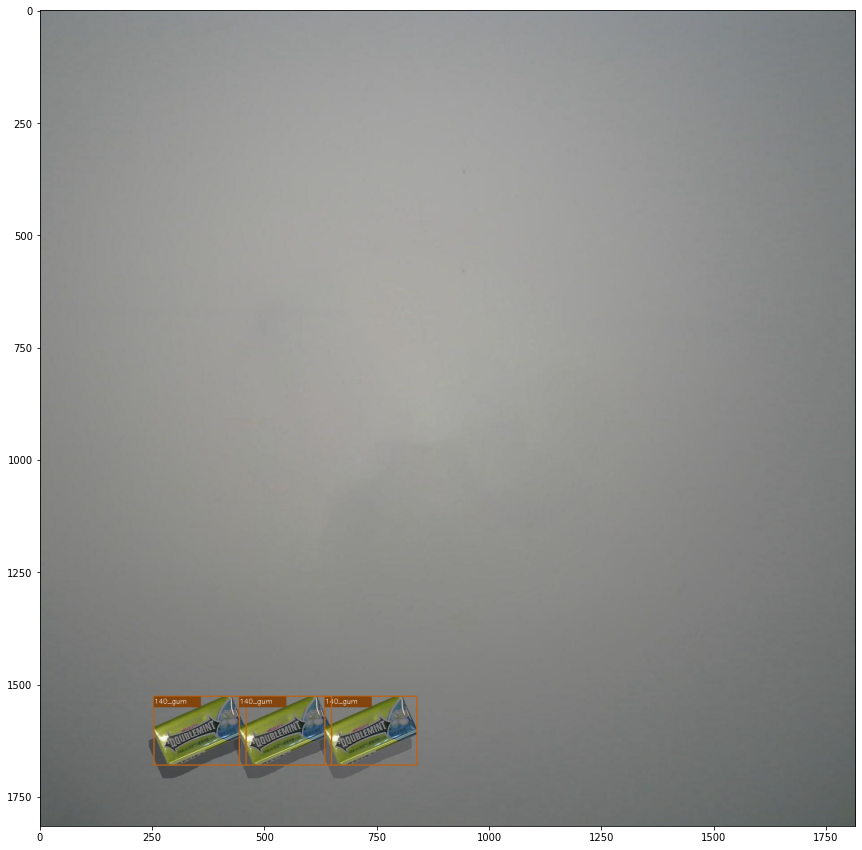

In [8]:
cat_ids = coco.getCatIds()
cats = coco.loadCats(cat_ids)
cat_names = [cat["name"] for cat in cats]

imgids = coco.getImgIds()
img = coco.loadImgs(imgids[np.random.randint(0, len(imgids))])[0]
img_annIds = coco.getAnnIds(imgIds=img['id'], iscrowd=None) # 读取这张图片的所有seg_id
img_anns = coco.loadAnns(img_annIds)

image = io.imread(os.path.join(imgroot, img['file_name']))
for i in range(len(img_annIds)):
    cls_id = int(img_anns[i-1]['category_id'])
    x, y, w, h = img_anns[i-1]['bbox']  # 读取边框

    color = (_COLORS[cls_id] * 255).astype(np.uint8).tolist()
    text = '{}'.format(cat_names[cls_id-1])
    txt_color = (0, 0, 0) if np.mean(_COLORS[cls_id]) > 0.5 else (255, 255, 255)
    font = cv2.FONT_HERSHEY_SIMPLEX
    txt_bk_color = (_COLORS[cls_id] * 255 * 0.7).astype(np.uint8).tolist()
    txt_size = cv2.getTextSize(text, font, 0.7, 1)[0]


    image = cv2.rectangle(image, (int(x), int(y)), (int(x + w), int(y + h)), color, 2)
    # text
    image = cv2.rectangle(
        image,
        (x, y + 1),
        (x + txt_size[0] + 1, y + int(1.5 * txt_size[1])),
        txt_bk_color,
        -1
    )
    image = cv2.putText(image, text, (x, y + txt_size[1]), font, 0.5, txt_color, thickness=1)
plt.rcParams['figure.figsize'] = (15.0, 15.0)
plt.imshow(image)
# coco.showAnns(img_anns)
plt.show()